Спрос

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as MAE
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

Индекс промышленного производства по РФ, % м/м

In [89]:
df = pd.read_excel('Задание.xlsx')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

In [90]:
data_indicator = df[['Дата', 'Индикатор тональности СМИ в сфере ритейла по РФ']].copy()

In [91]:
data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по РФ, % м/м']].copy()

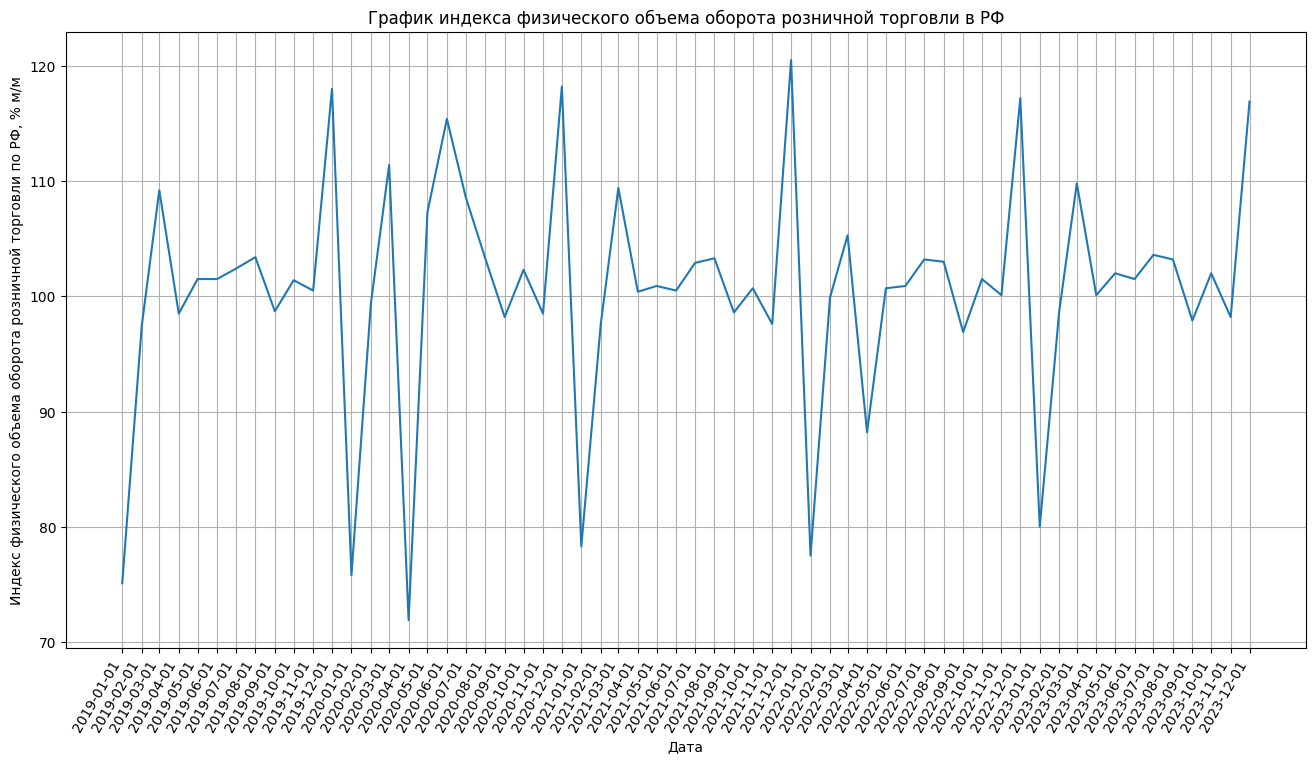

In [93]:
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по РФ, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в РФ')  
plt.show()

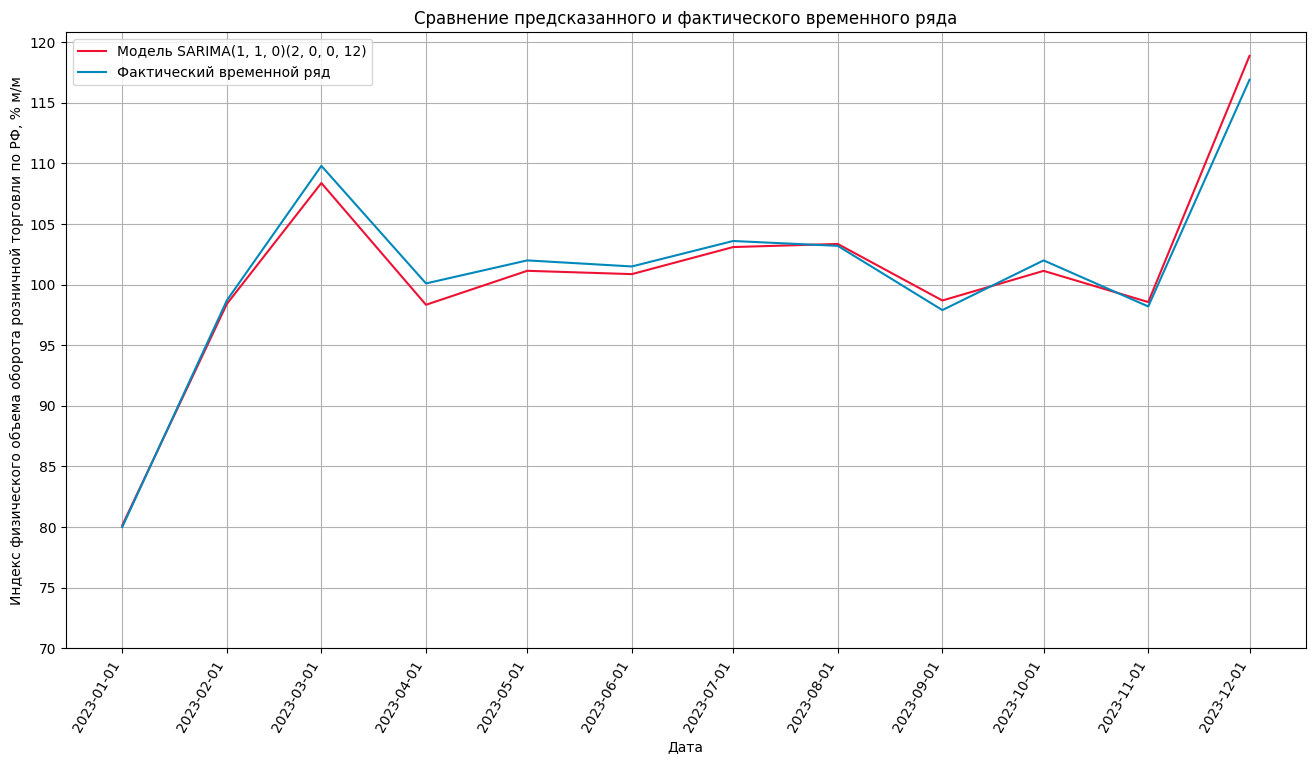

MSE: 1.0005680642137786
MAE: 0.8117928155764567
R^2: 0.9851464970019367
RMSE: 1.0002839917812234


In [94]:
p, d, q = 1, 1, 0

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][:-12], order=(p, d, q), seasonal_order=(2, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по РФ, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(70, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index["Индекс физического объема оборота розничной торговли по РФ, % м/м"][-12:], SARIMA_predictions)))

In [95]:
with open('demand_rf_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     80.138145
49     98.410185
50    108.383412
Name: predicted_mean, dtype: float64


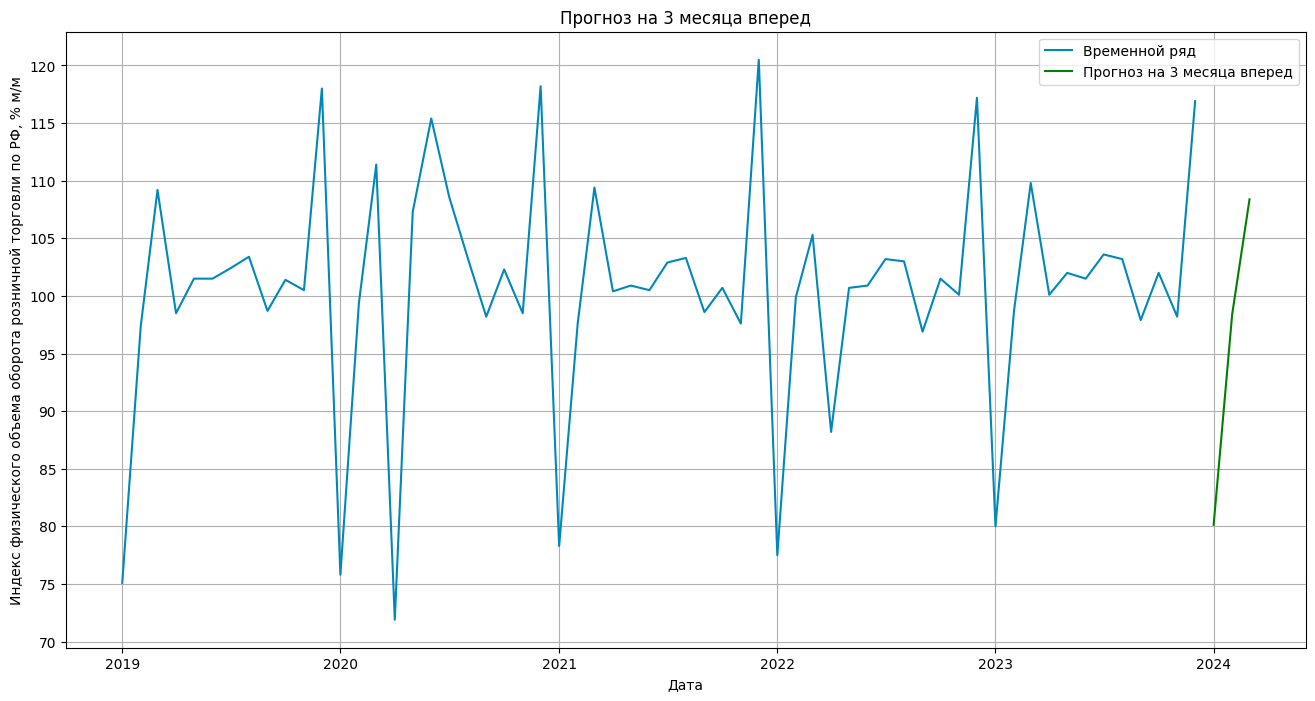

In [96]:
with open('demand_rf_mom.pkl', 'rb') as file:
    SARIMA_result = pickle.load(file)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

48     80.138145
49     98.410185
50    108.383412
Name: predicted_mean, dtype: float64


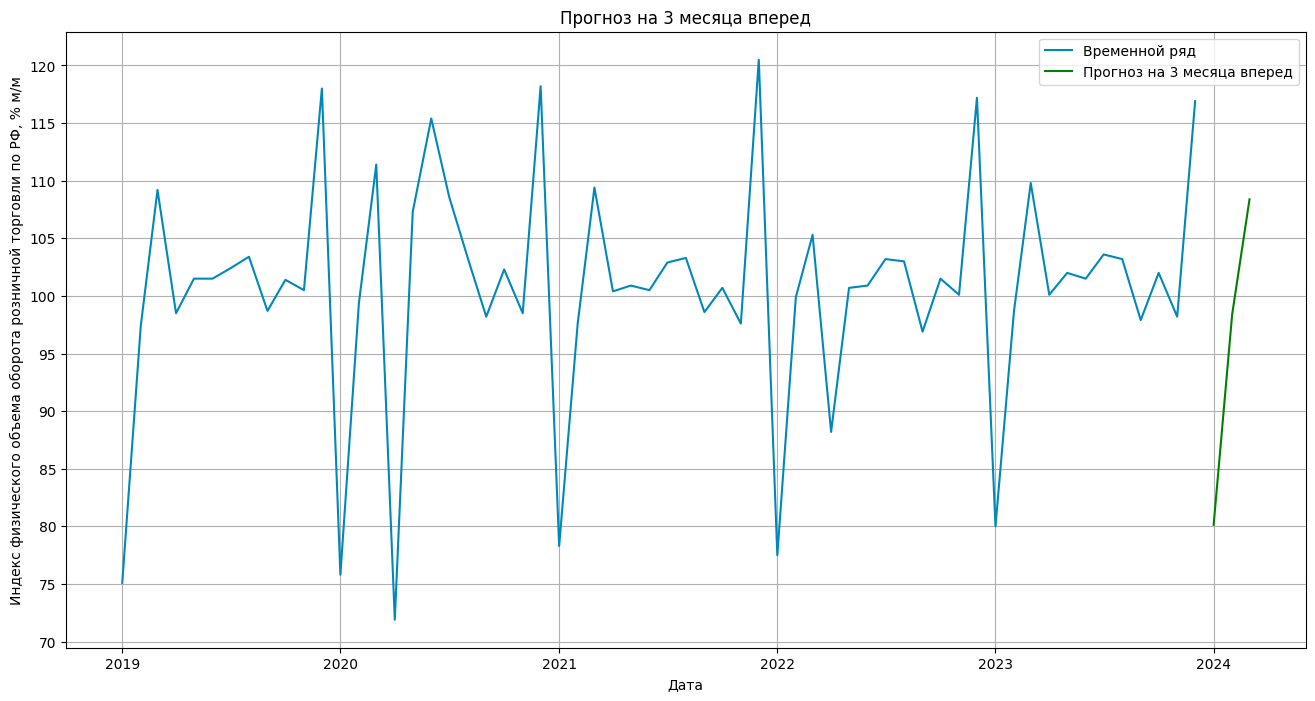

In [65]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс физического объема оборота розничной торговли по Москве, % м/м

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


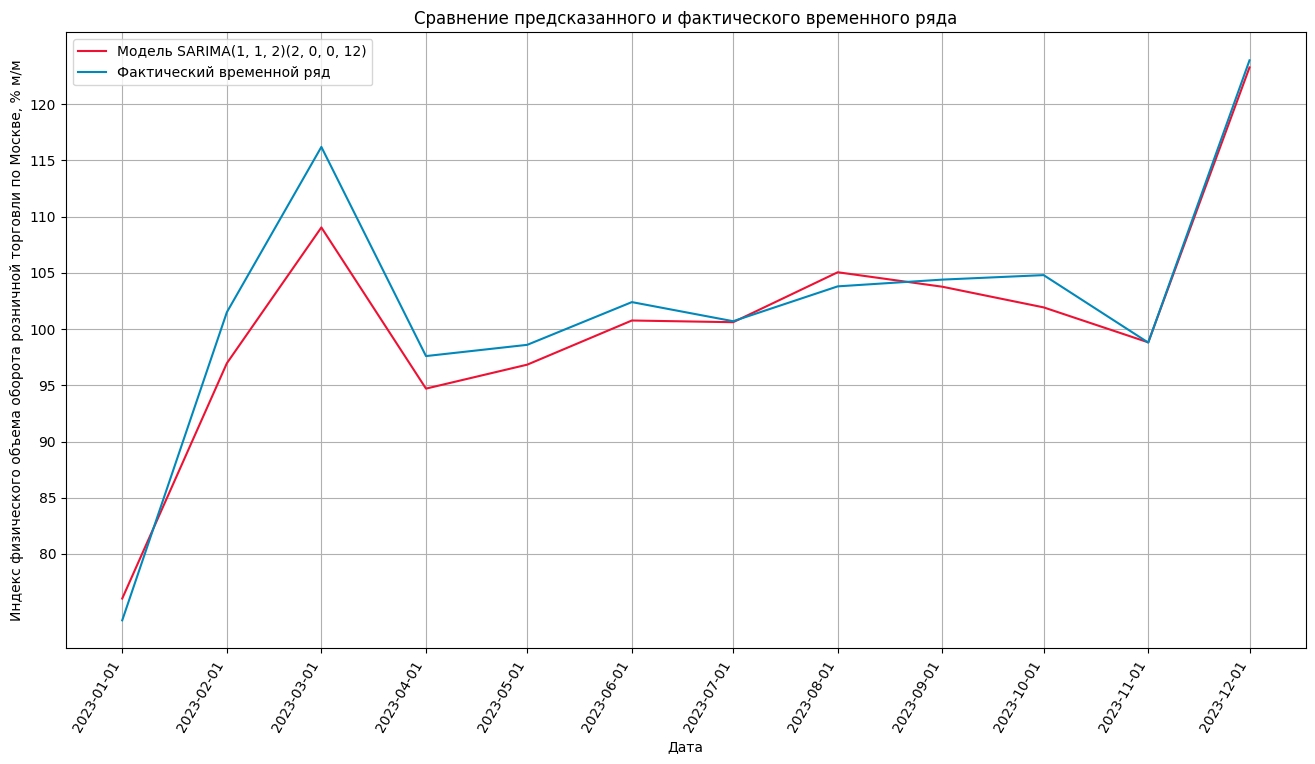

MSE: 8.365948257772684
MAE: 2.118931992020528
R^2: 0.9339142001703158
RMSE: 2.8923949000391844


In [97]:
df = pd.read_excel('Задание.xlsx', sheet_name='Спрос')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Москве, % м/м']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по Москве, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в Москве')  
"""

p, d, q = 1, 1, 2

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][:-12], order=(p, d, q), seasonal_order=(2, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по Москве, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'][-12:], SARIMA_predictions)))

In [98]:
with open('demand_m_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     76.039459
49     96.963207
50    109.039723
Name: predicted_mean, dtype: float64


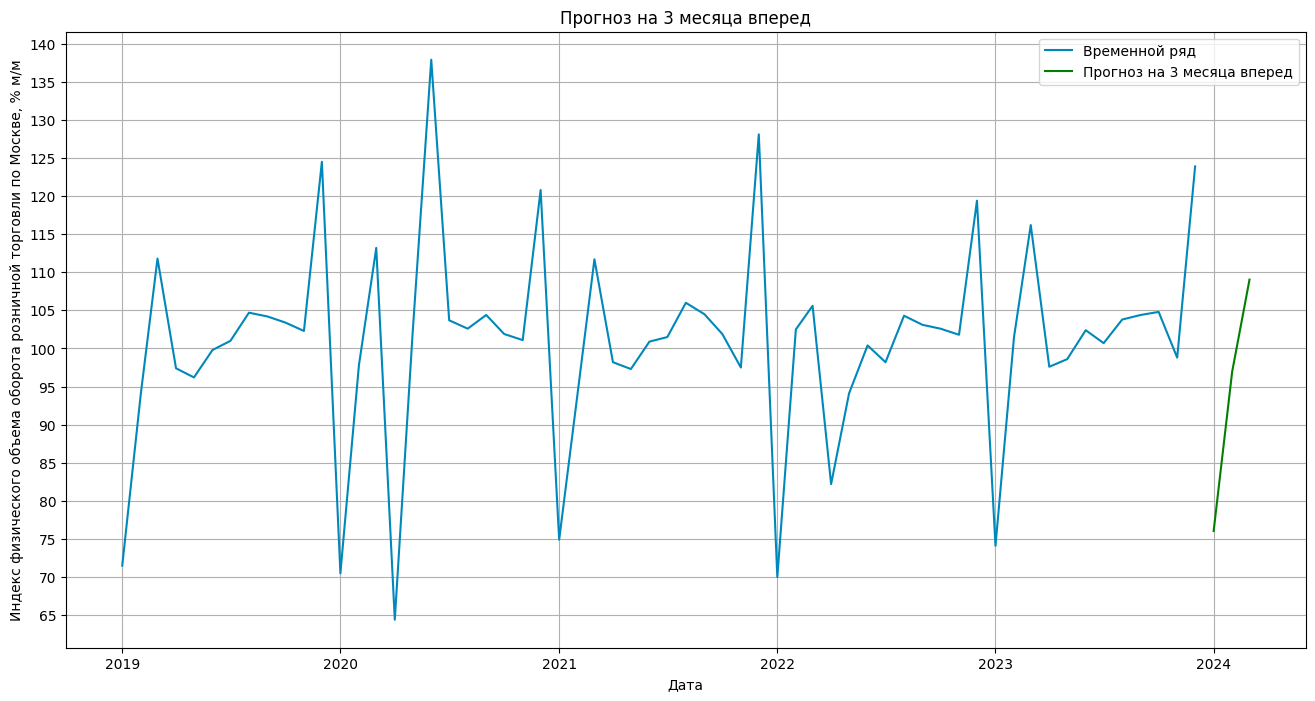

In [99]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 140+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс физического объема оборота розничной торговли по Московской области, % м/м

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


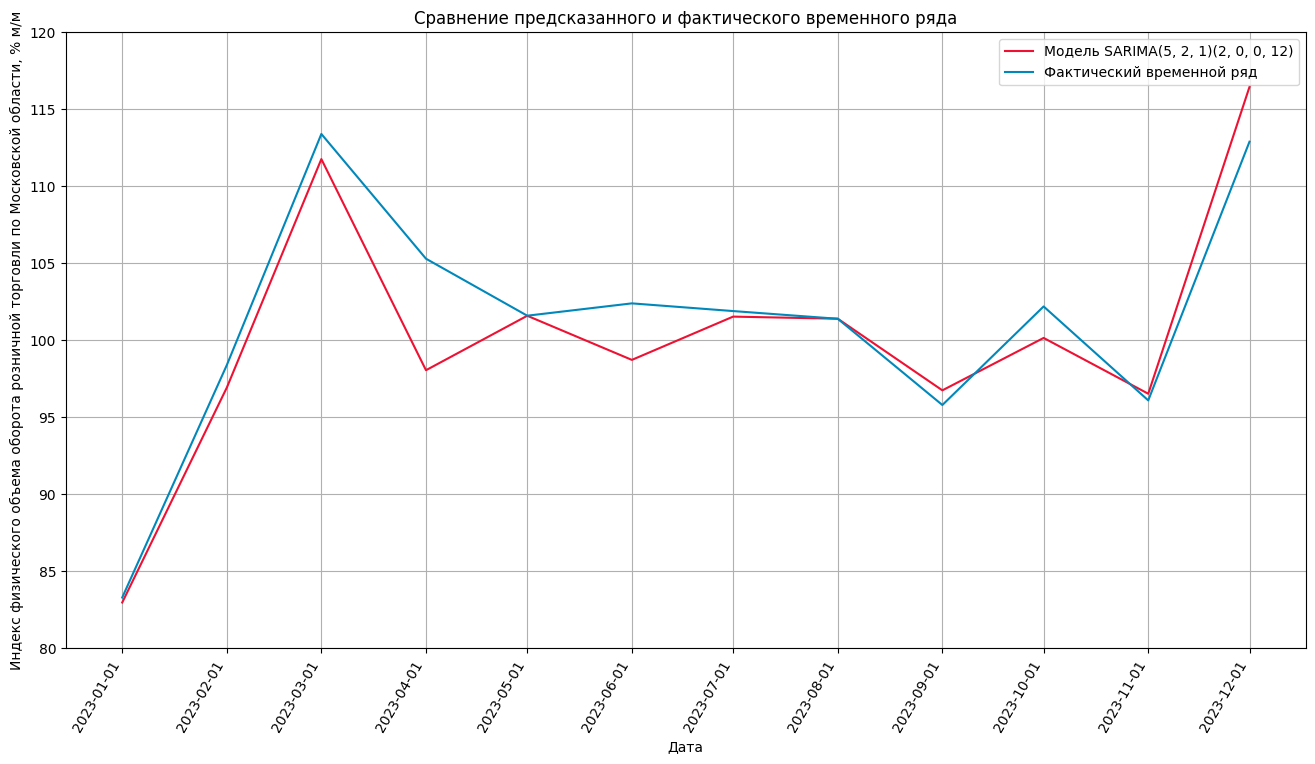

MSE: 7.4054180256004924
MAE: 1.8070693485122789
R^2: 0.8710386400652957
RMSE: 2.7212897724425624


In [101]:
df = pd.read_excel('Задание.xlsx', sheet_name='Спрос')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Московской области, % м/м']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по Московской области, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в Московской области')  
"""

p, d, q = 5, 2, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][:-12], order=(p, d, q), seasonal_order=(2, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по Московской области, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'][-12:], SARIMA_predictions)))

In [102]:
with open('demand_mo_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     82.975076
49     96.935994
50    111.769932
Name: predicted_mean, dtype: float64


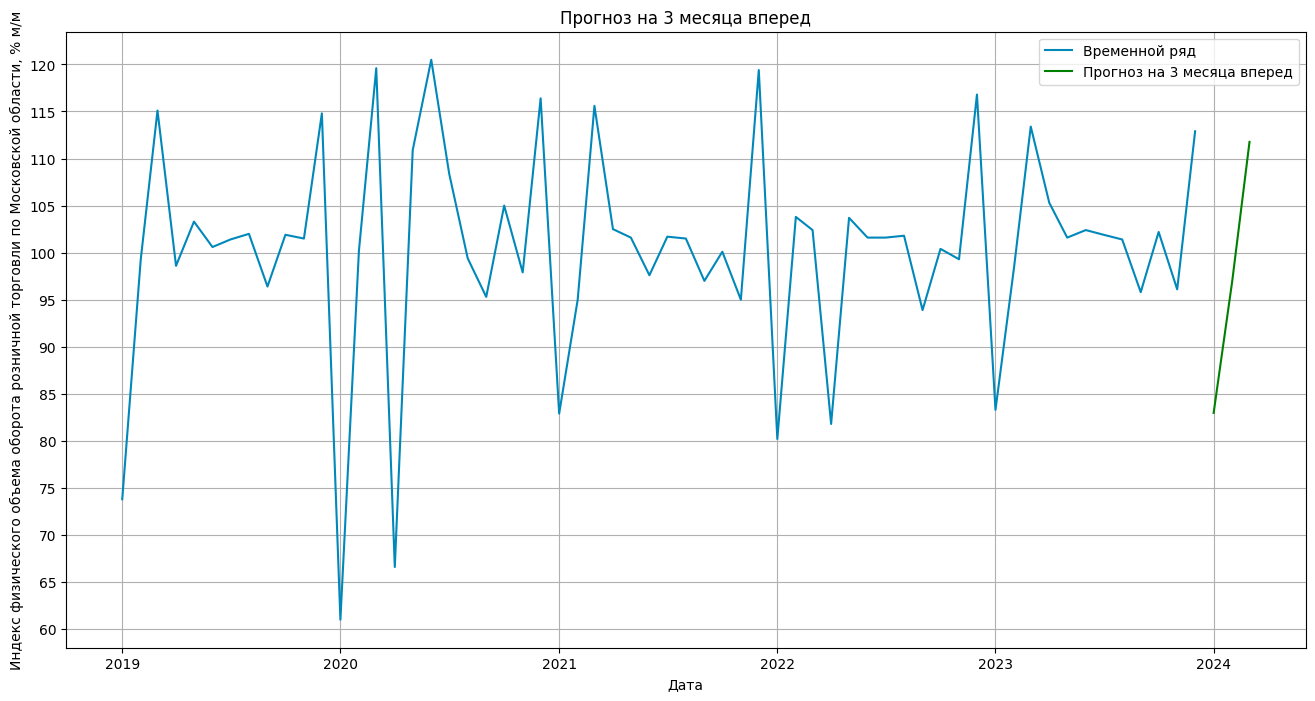

In [103]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс физического объема оборота розничной торговли по РФ, % г/г

Text(0.5, 1.0, 'График индекса физического объема оборота розничной торговли в Московской области')

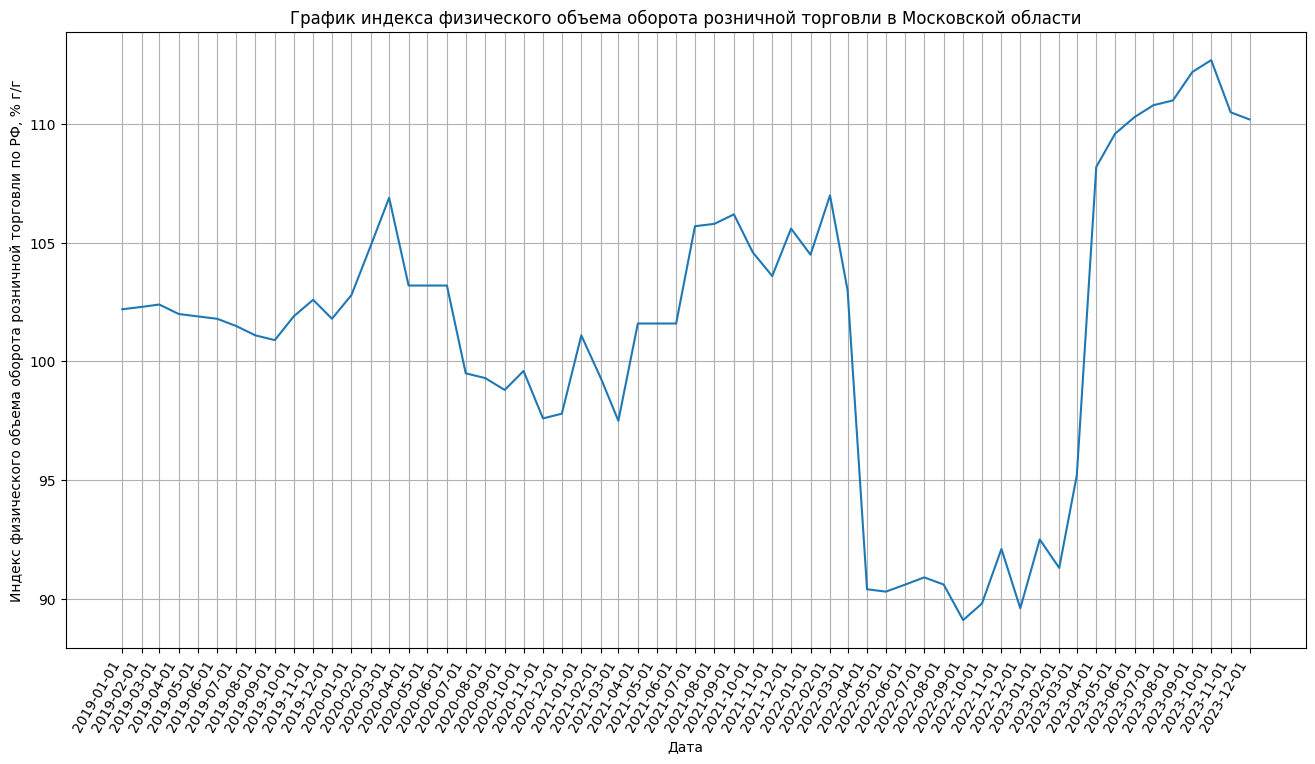

In [104]:
df = pd.read_excel('Задание.xlsx', sheet_name='Спрос')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по РФ, % г/г']].copy()


df.loc[df['Дата'].dt.date == pd.to_datetime('2020-04-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])
df.loc[df['Дата'].dt.date == pd.to_datetime('2020-05-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])
df.loc[df['Дата'].dt.date == pd.to_datetime('2020-06-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2020-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])

df.loc[df['Дата'].dt.date == pd.to_datetime('2021-04-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])
df.loc[df['Дата'].dt.date == pd.to_datetime('2021-05-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])
df.loc[df['Дата'].dt.date == pd.to_datetime('2021-06-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'] = np.mean([
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-03-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values,
    df.loc[df['Дата'].dt.date == pd.to_datetime('2021-07-01').date(), 'Индекс физического объема оборота розничной торговли по РФ, % г/г'].values
])

plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по РФ, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в Московской области')  


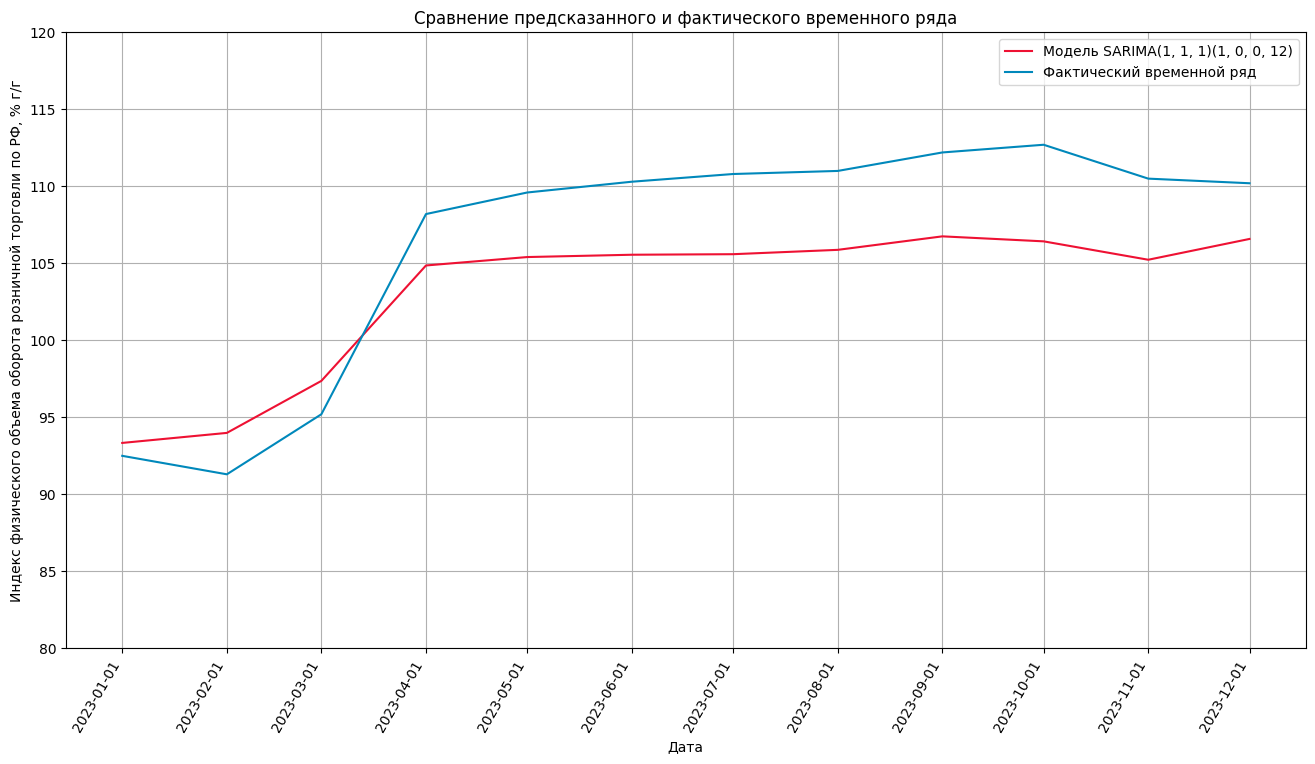

MSE: 18.920907623357426
MAE: 4.075143512605821
R^2: 0.6846555544126789
RMSE: 4.349816964351192


In [74]:
p, d, q = 1, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][:-12], order=(p, d, q), seasonal_order=(1, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по РФ, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(1, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % г/г')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'][-12:], SARIMA_predictions)))



Предсказание следующих трех месяцев 

48    93.338252
49    93.989140
50    97.366358
Name: predicted_mean, dtype: float64


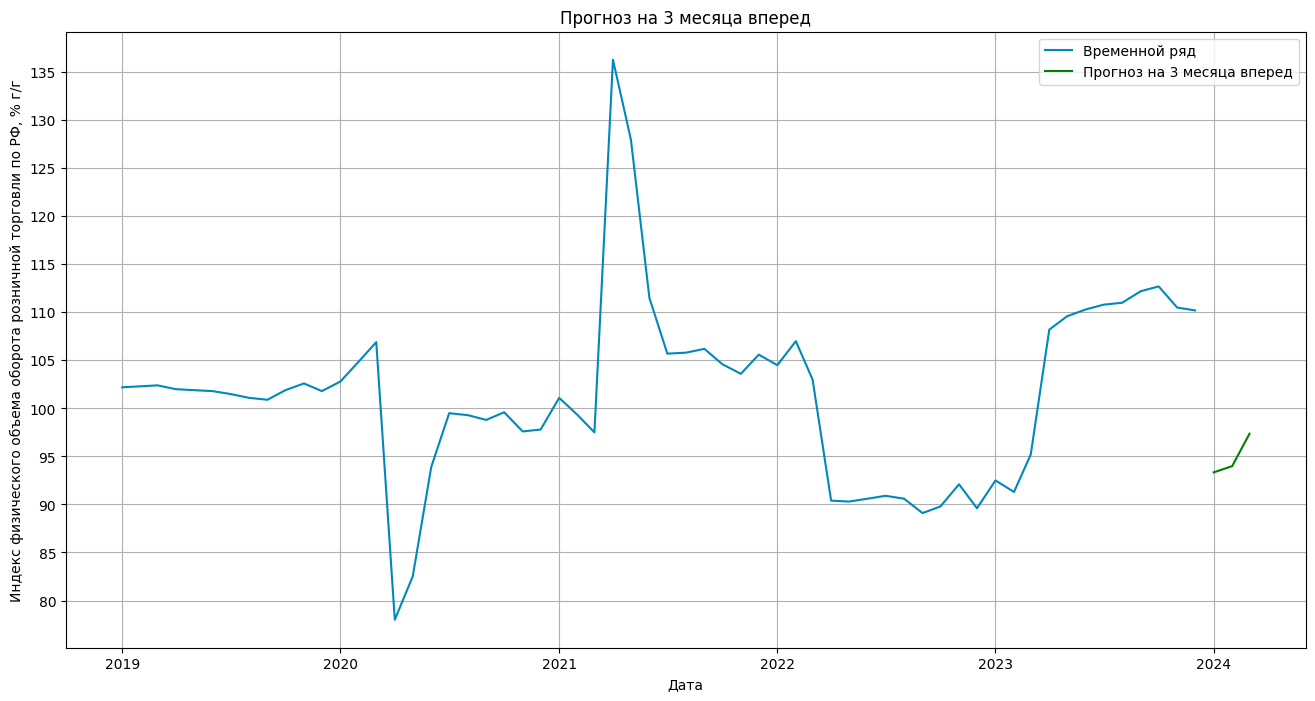

In [78]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(75, 140+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по РФ, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс физического объема оборота розничной торговли по Москве, % г/г

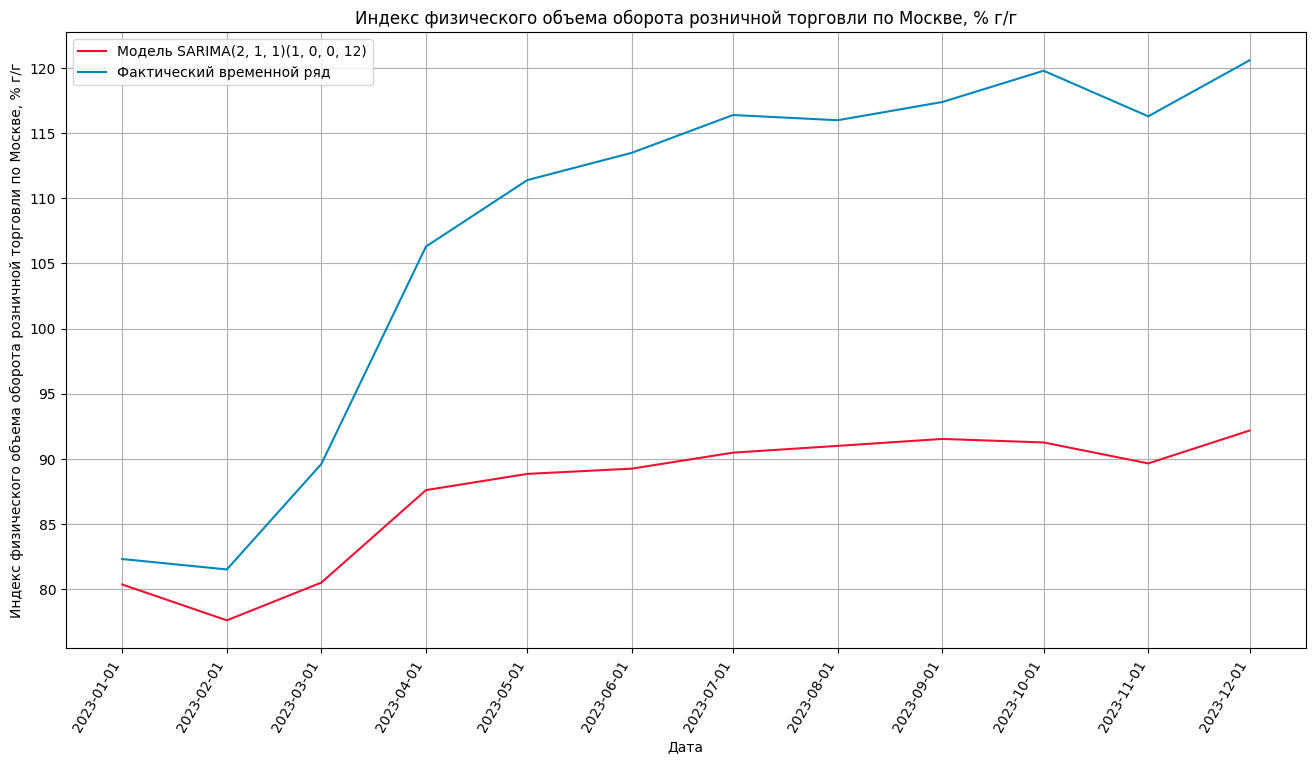

MSE: 487.5595971325824
MAE: 20.078957377494167
R^2: -1.506938120372304
RMSE: 22.080751733865004


In [79]:
df = pd.read_excel('Задание.xlsx', sheet_name='Спрос')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Москве, % г/г']].copy()

"""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по Москве, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в Москве')  
"""

p, d, q = 2, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][:-12], order=(p, d, q), seasonal_order=(1, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по Москве, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(1, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % г/г')   
plt.title('Индекс физического объема оборота розничной торговли по Москве, % г/г')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'][-12:], SARIMA_predictions)))

Предсказание следующих трех месяцев 

48    80.345573
49    77.592344
50    80.490689
Name: predicted_mean, dtype: float64


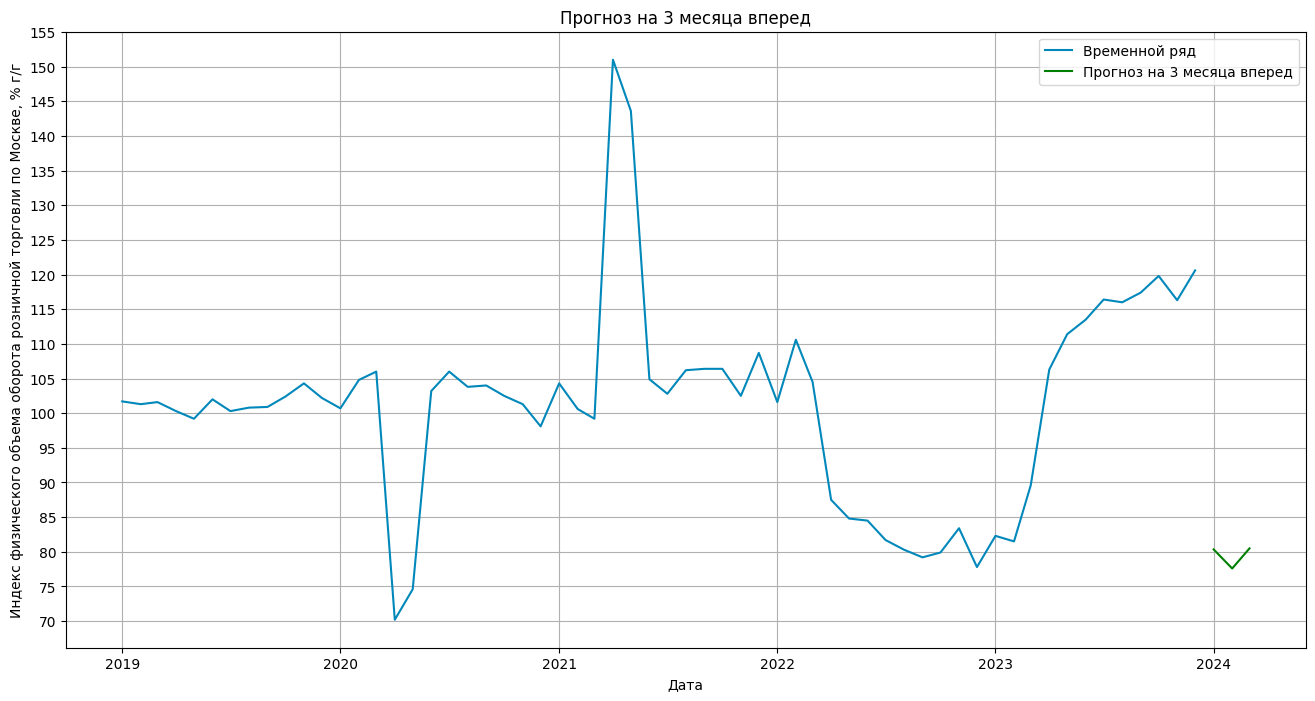

In [82]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 155+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Москве, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс физического объема оборота розничной торговли по Московской области, % г/г

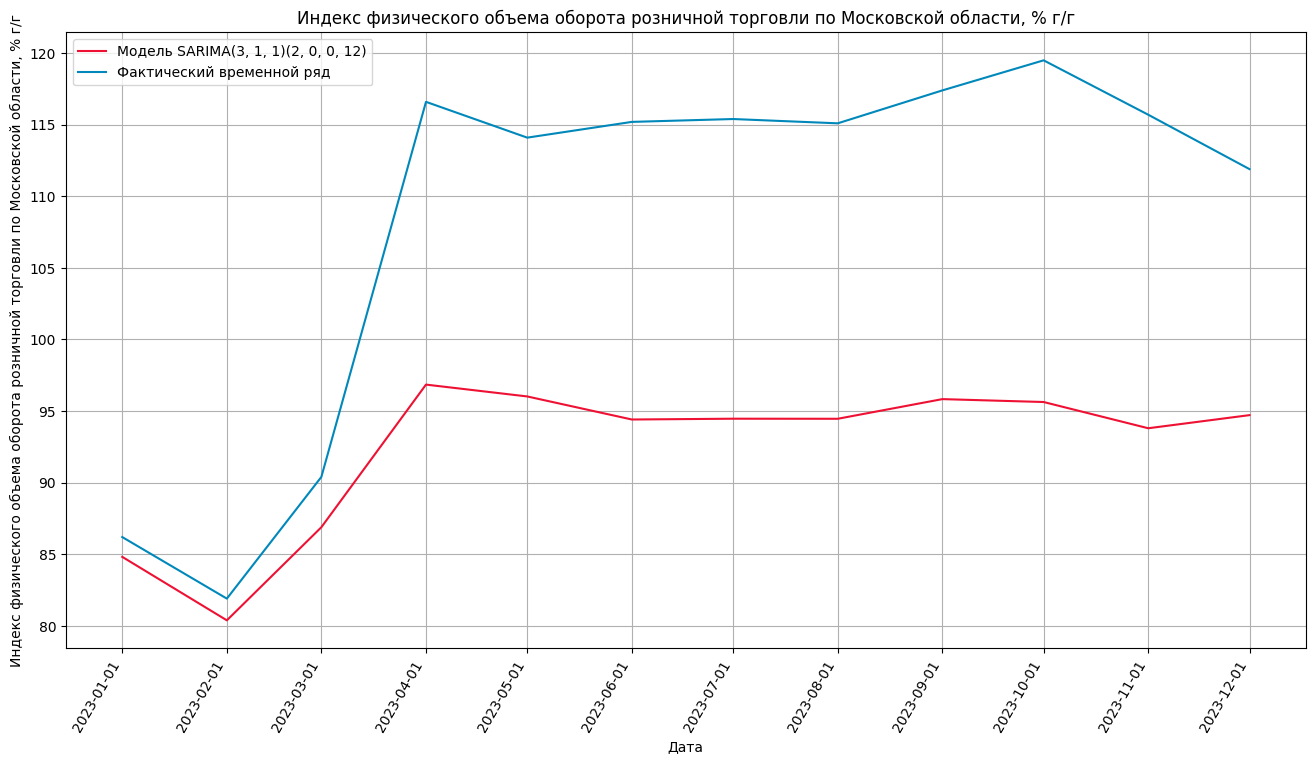

MSE: 319.9416862338519
MAE: 15.926304772671791
R^2: -0.8926452244587924
RMSE: 17.886913826422152


In [83]:
df = pd.read_excel('Задание.xlsx', sheet_name='Спрос')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Московской области, % г/г']].copy()

"""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс физического объема оборота розничной торговли по Московской области, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в Московской области')  
"""

p, d, q = 3, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][:-12], order=(p, d, q), seasonal_order=(1, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][:-12]), end=len(df['Индекс физического объема оборота розничной торговли по Москве, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')

plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % г/г')   
plt.title('Индекс физического объема оборота розничной торговли по Московской области, % г/г')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'][-12:], SARIMA_predictions)))

Предсказание следующих трех месяцев 

48    84.817386
49    80.383154
50    86.887586
Name: predicted_mean, dtype: float64


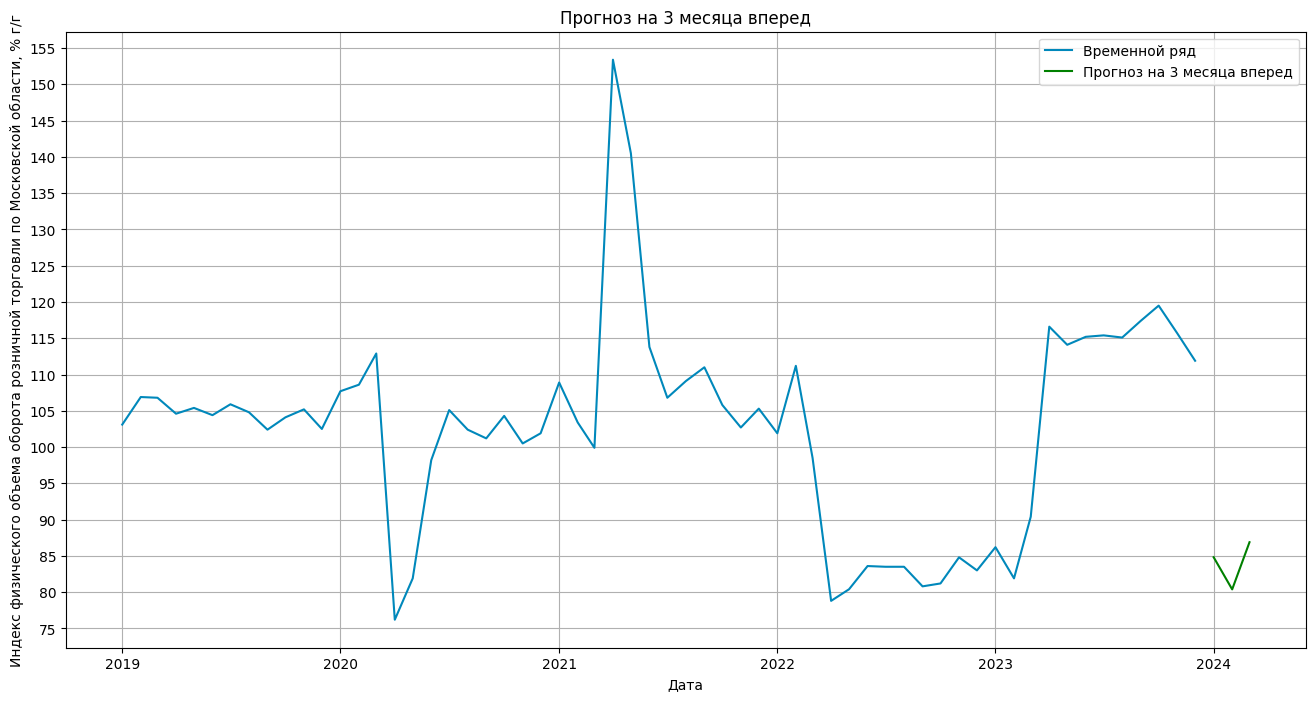

In [87]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 155+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Московской области, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()